# 전국 병원 현황에 따른 지역 의료 격차

---

# 프로젝트 소개<br>
- 각 지역의 병원 등의 수 확인하기 위해 **전국 병원 현황 데이터**를 활용
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습
- 지역 간의 의료시설 격차를 알아보고 지역의료 부족에 관해 다시 생각해 볼 수 있음

---

# 프로젝트 목차<br>
1. **데이터 읽기:** 병원 정보 데이터를 불러오고 DataFrame 구조를 확인<br>
    1.1. 데이터 불러오기<br>
    1.2. 데이터 확인하기<br>
<br>
2. **데이터 정제:** 데이터 확인 후 형 변환 및 이상치 데이터 처리<br>
    2.1 Null값 확인하기<br>
    2.2 열 이름 변경하기<br>
<br>
3. **데이터 시각화:** 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악<br>
    3.1 지역별 전체 병원시설 수 알아보기<br>
    3.2 병원급 이상 시설의 수 알아보기<br>
<br>
4. **프로젝트 발전 가능성**<br>
<br>
5. **프로젝트 후기**

---

# 데이터 출처<br>
- 건강보험심사평가원_전국 병의원 및 약국 현황: https://www.data.go.kr/data/15051059/fileData.do

---

# 프로젝트 기획 배경<br>
- 요즘 **병원 치료를 받으러 지방에서 서울로 올라가는 사람들**이 많다는 뉴스를 접하였습니다. 또한 지역 간 의료 인력의 격차가 심하고 필수 의료 서비스가 부족하다는 뉴스도 많이 접할 수 있습니다. 저도 지방에 거주하며 이러한 것을 많이 느껴왔습니다. 그래서 전국 병원 현황을 통해 그 격차를 좀 더 상세히 알아보려 합니다.<br>
<br>
- 우리 일상에서 중요한 부분 중 하나인 의료 서비스를 많은 이들이 쉽고, 편하게 집 근처에서 받을 수 있는 환경이 하루빨리 만들어지길 바라는 생각에 프로젝트를 구상하게 되었습니다.

---

# 1. 데이터 읽기

In [201]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### 1.1 데이터 불러오기

In [202]:
# pd.read_csv를 통하여 병원 정보 데이터를 데이터프레임 형태로 읽어옵니다.
hos_all = pd.read_csv("./data/병원정보.csv", encoding = 'cp949')

### 1.2 데이터 확인하기

In [203]:
# 상위 10개 데이터를 출력합니다.
hos_all.head(10)

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,좌표(X),좌표(Y)
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합,220000,인천,220003,인천부평구,NaN,NaN,...,1,0,0,2,0,0,0,0,126.724899,37.484831
1,JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,강릉아산병원,1,상급종합,320000,강원,320100,강릉시,NaN,25440.0,...,0,0,0,2,0,0,0,0,128.857841,37.818433
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합,110000,서울,110016,종로구,NaN,3181.0,...,3,0,0,5,0,0,0,0,126.967750,37.568408
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,건국대학교병원,1,상급종합,110000,서울,110023,광진구,NaN,5030.0,...,0,0,0,3,0,0,0,0,127.071828,37.540376
4,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합,230000,대구,230006,대구중구,NaN,41944.0,...,0,0,0,1,0,0,0,0,128.604125,35.866774
5,JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,경상국립대학교병원,1,상급종합,380000,경남,380500,진주시,NaN,52727.0,...,1,0,0,1,0,0,0,0,128.095672,35.176325
6,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,상급종합,110000,서울,110007,동대문구,NaN,2447.0,...,0,0,0,0,0,0,0,0,127.051852,37.594119
7,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,계명대학교동산병원,1,상급종합,230000,대구,230007,대구달서구,NaN,42601.0,...,3,0,0,1,0,0,0,0,128.480131,35.853886
8,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,고려대학교의과대학부속구로병원,1,상급종합,110000,서울,110005,구로구,NaN,8308.0,...,0,6,16,10,0,0,0,0,126.884870,37.492052
9,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,고려대학교의과대학부속안산병원,1,상급종합,310000,경기,311101,안산단원구,NaN,15355.0,...,0,0,0,4,0,0,0,0,126.824903,37.318514


In [204]:
# 병원 정보 데이터프레임 정보를 요약하여 출력합니다. 
hos_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76032 entries, 0 to 76031
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화요양기호     76032 non-null  object 
 1   요양기관명       76032 non-null  object 
 2   종별코드        76032 non-null  int64  
 3   종별코드명       76032 non-null  object 
 4   시도코드        76032 non-null  int64  
 5   시도코드명       76032 non-null  object 
 6   시군구코드       76032 non-null  int64  
 7   시군구코드명      76032 non-null  object 
 8   읍면동         27806 non-null  object 
 9   우편번호        76031 non-null  float64
 10  주소          76032 non-null  object 
 11  병원홈페이지      8879 non-null   object 
 12  개설일자        76025 non-null  object 
 13  총의사수        76032 non-null  int64  
 14  의과일반의 인원수   76032 non-null  int64  
 15  의과인턴 인원수    76032 non-null  int64  
 16  의과레지던트 인원수  76032 non-null  int64  
 17  의과전문의 인원수   76032 non-null  int64  
 18  치과일반의 인원수   76032 non-null  int64  
 19  치과인턴 인원수    76032 non-nul

# 2. 데이터 정제

In [205]:
# 불필요한 컬럼 삭제
hos_recent = hos_all.drop(columns={'암호화요양기호', '종별코드', '시도코드', '시군구코드', '시군구코드명', '읍면동', '우편번호' , '주소', '병원홈페이지', '개설일자', '총의사수', '의과일반의 인원수', '의과인턴 인원수', '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수', '치과인턴 인원수', '치과레지던트 인원수', '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수', '한방레지던트 인원수', '한방전문의 인원수', '좌표(X)','좌표(Y)'})
hos_recent

,요양기관명,종별코드명,시도코드명
0,가톨릭대학교인천성모병원,상급종합,인천
1,강릉아산병원,상급종합,강원
2,강북삼성병원,상급종합,서울
3,건국대학교병원,상급종합,서울
4,경북대학교병원,상급종합,대구
...,...,...,...
76027,힘나는한의원,한의원,경기
76028,힘내라한의원,한의원,서울
76029,힘찬걸음한의원,한의원,경기
76030,힘찬마디한의원,한의원,서울


### 2.1 Null값 확인하기

In [206]:
hos_recent.isnull().sum()

요양기관명    0
종별코드명    0
시도코드명    0
dtype: int64

### 2.2 열 이름 변경하기

In [207]:
hos_recent.rename(columns={'요양기관명':'이름'}, inplace=True)
hos_recent.rename(columns={'종별코드명':'분류'}, inplace=True)
hos_recent.rename(columns={'시도코드명':'지역'}, inplace=True)

In [208]:
hos_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76032 entries, 0 to 76031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      76032 non-null  object
 1   분류      76032 non-null  object
 2   지역      76032 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [209]:
sorted(list(set(hos_recent['지역'])))

['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '서울',
 '세종시',
 '울산',
 '인천',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북']

In [210]:
sorted(list(set(hos_recent['분류'])))

['병원',
 '보건소',
 '보건의료원',
 '보건지소',
 '보건진료소',
 '상급종합',
 '요양병원',
 '의원',
 '정신병원',
 '조산원',
 '종합병원',
 '치과병원',
 '치과의원',
 '한방병원',
 '한의원']

In [211]:
hos_recent.groupby(['지역']).count()['분류']

지역
강원      1938
경기     16864
경남      4203
경북      3408
광주      2265
대구      3973
대전      2335
부산      5468
서울     18601
세종시      428
울산      1413
인천      3646
전남      2630
전북      2909
제주      1008
충남      2761
충북      2182
Name: 분류, dtype: int64

In [213]:
hos_recent.groupby(['분류']).count()['지역']

분류
병원        1403
보건소        243
보건의료원       15
보건지소      1322
보건진료소     1906
상급종합        45
요양병원      1447
의원       34845
정신병원       252
조산원         15
종합병원       327
치과병원       237
치과의원     18820
한방병원       529
한의원      14626
Name: 지역, dtype: int64

# 3. 데이터 시각화

### 3.1 지역별 전체 병원시설 수 알아보기

In [215]:
hos_강원 = hos_recent[hos_recent['지역'].str.startswith('강원')].copy().groupby(['지역']).count()['분류']
hos_경기 = hos_recent[hos_recent['지역'].str.startswith('경기')].copy().groupby(['지역']).count()['분류']
hos_경남 = hos_recent[hos_recent['지역'].str.startswith('경남')].copy().groupby(['지역']).count()['분류']
hos_경북 = hos_recent[hos_recent['지역'].str.startswith('경북')].copy().groupby(['지역']).count()['분류']
hos_광주 = hos_recent[hos_recent['지역'].str.startswith('광주')].copy().groupby(['지역']).count()['분류']
hos_대구 = hos_recent[hos_recent['지역'].str.startswith('대구')].copy().groupby(['지역']).count()['분류']
hos_대전 = hos_recent[hos_recent['지역'].str.startswith('대전')].copy().groupby(['지역']).count()['분류']
hos_부산 = hos_recent[hos_recent['지역'].str.startswith('부산')].copy().groupby(['지역']).count()['분류']
hos_서울 = hos_recent[hos_recent['지역'].str.startswith('서울')].copy().groupby(['지역']).count()['분류']
hos_세종시 = hos_recent[hos_recent['지역'].str.startswith('세종시')].copy().groupby(['지역']).count()['분류']
hos_울산 = hos_recent[hos_recent['지역'].str.startswith('울산')].copy().groupby(['지역']).count()['분류']
hos_인천 = hos_recent[hos_recent['지역'].str.startswith('인천')].copy().groupby(['지역']).count()['분류']
hos_전남 = hos_recent[hos_recent['지역'].str.startswith('전남')].copy().groupby(['지역']).count()['분류']
hos_전북 = hos_recent[hos_recent['지역'].str.startswith('전북')].copy().groupby(['지역']).count()['분류']
hos_제주 = hos_recent[hos_recent['지역'].str.startswith('제주')].copy().groupby(['지역']).count()['분류']
hos_충북 = hos_recent[hos_recent['지역'].str.startswith('충북')].copy().groupby(['지역']).count()['분류']
hos_충남 = hos_recent[hos_recent['지역'].str.startswith('충남')].copy().groupby(['지역']).count()['분류']

In [216]:
print(hos_강원.sum())
print(hos_경기.sum())
print(hos_경남.sum())
print(hos_경북.sum())
print(hos_광주.sum())
print(hos_대구.sum())
print(hos_대전.sum())
print(hos_부산.sum())
print(hos_서울.sum())
print(hos_세종시.sum())
print(hos_인천.sum())
print(hos_울산.sum())
print(hos_전남.sum())
print(hos_전북.sum())
print(hos_제주.sum())
print(hos_충북.sum())
print(hos_충남.sum())

1938
16864
4203
3408
2265
3973
2335
5468
18601
428
3646
1413
2630
2909
1008
2182
2761


In [218]:
hos_recent_1 = hos_recent.groupby(['지역']).count()['분류']

In [219]:
# 한글 폰트 설정 
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

<Figure size 2000x1000 with 0 Axes>

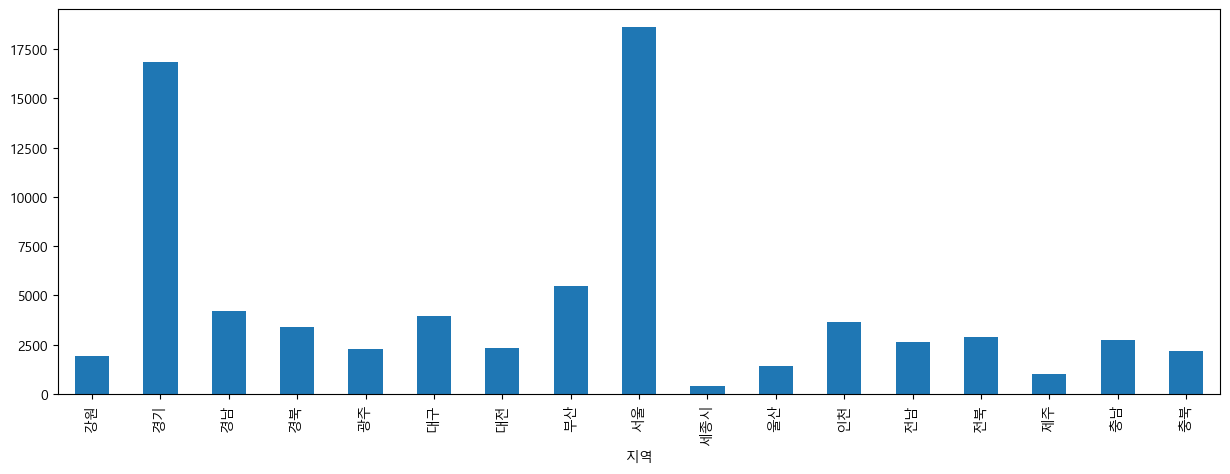

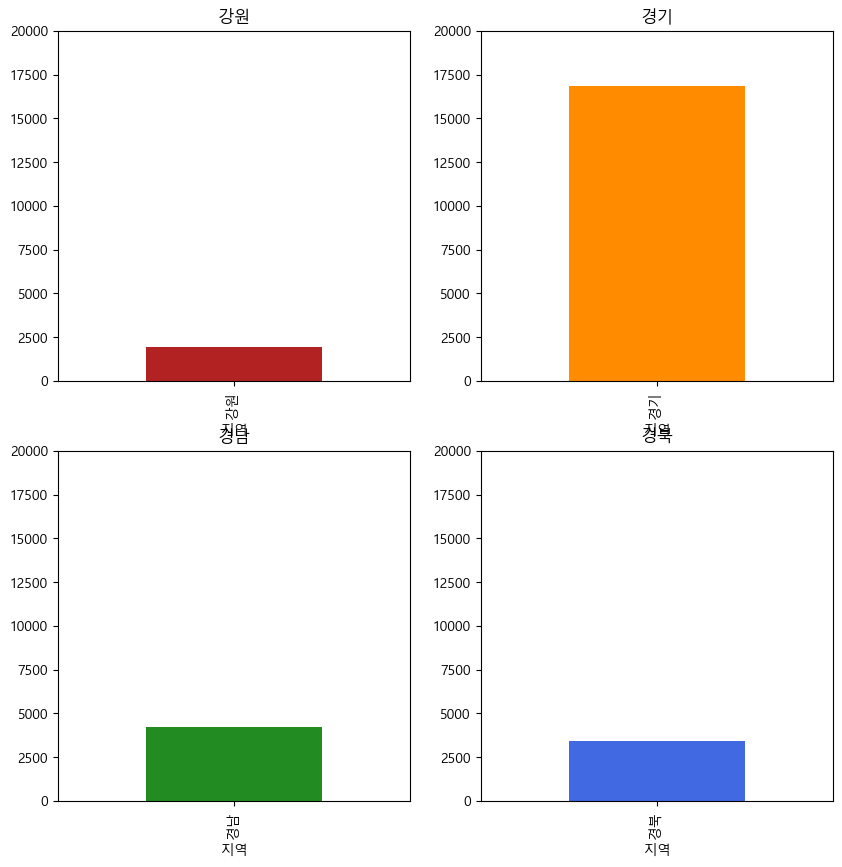

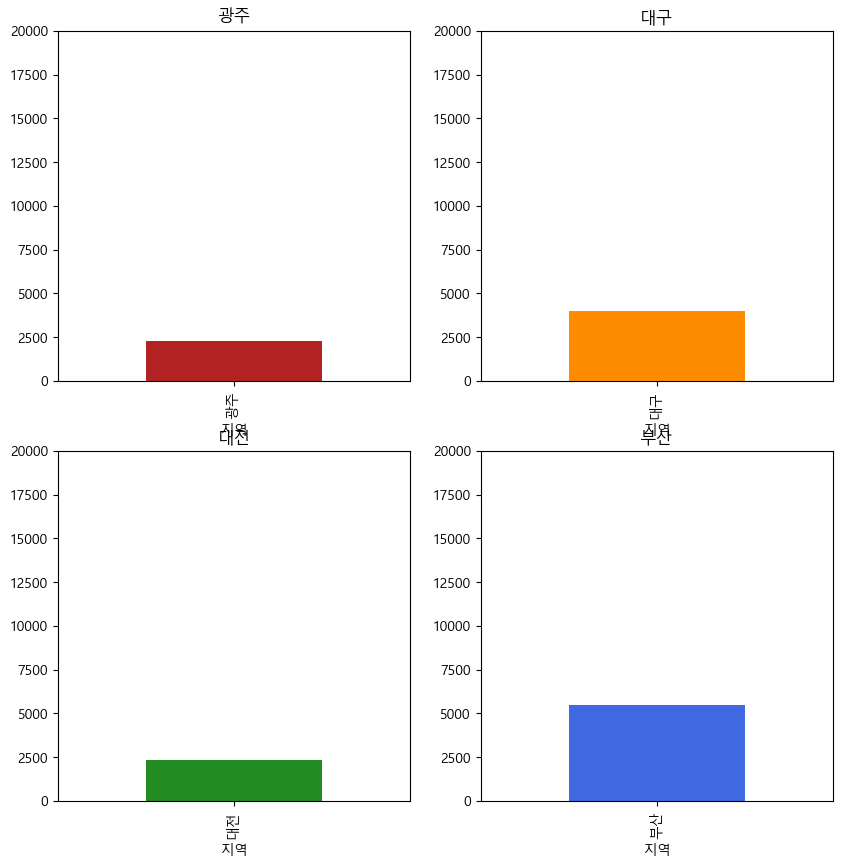

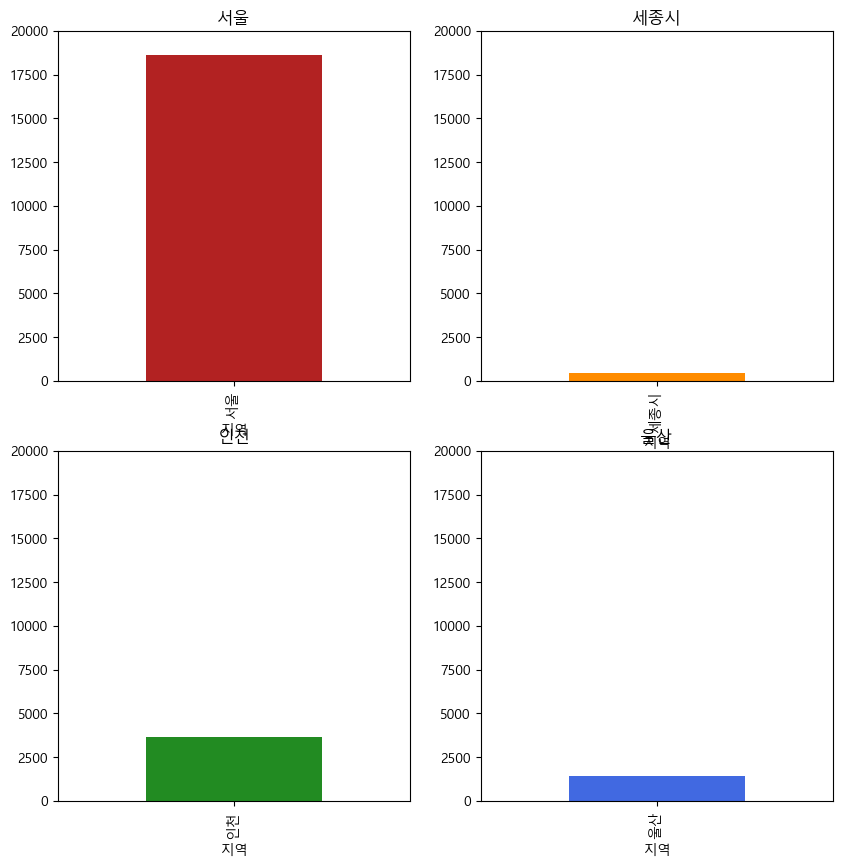

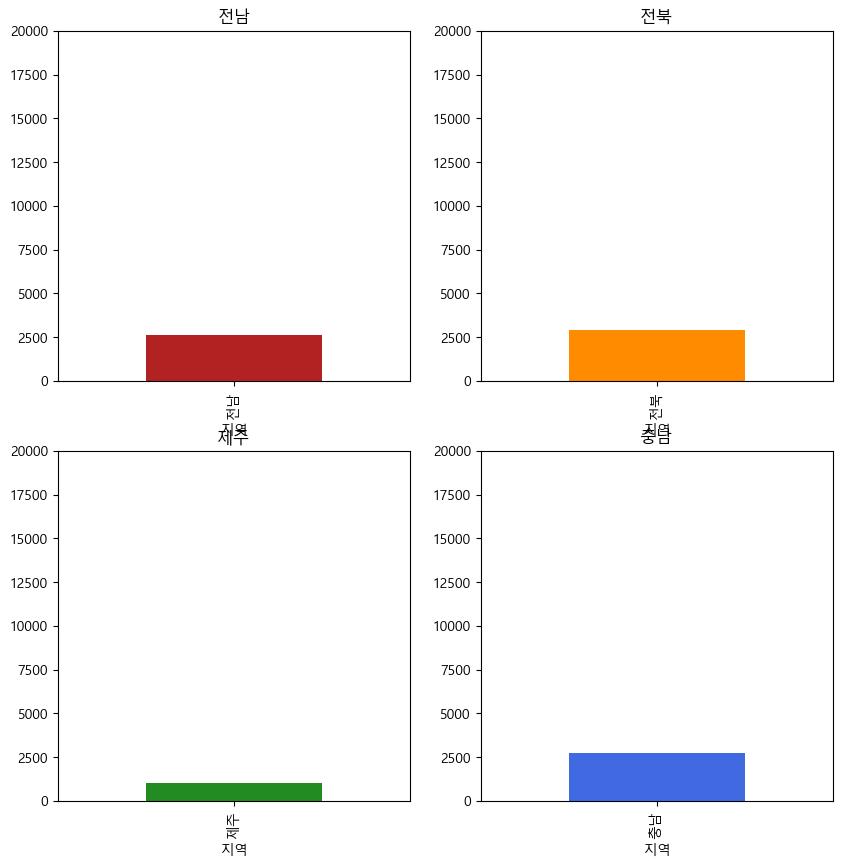

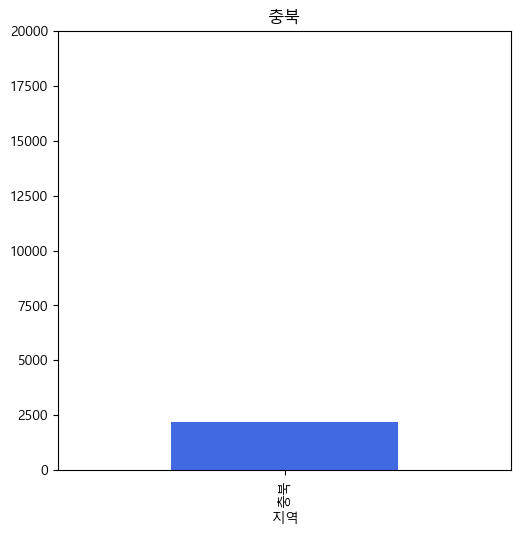

In [220]:
plt.figure(figsize=(20,10))

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 5))
hos_recent_1.plot(kind='bar')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
hos_강원.plot(kind='bar', color='firebrick')
plt.title('강원')
plt.ylim([0, 20000])

plt.subplot(2, 2, 2)
hos_경기.plot(kind='bar', color='darkorange')
plt.title('경기')
plt.ylim([0, 20000])

plt.subplot(2, 2, 3)
hos_경남.plot(kind='bar', color='forestgreen')
plt.title('경남')
plt.ylim([0, 20000])

plt.subplot(2, 2, 4)
hos_경북.plot(kind='bar', color='royalblue')
plt.title('경북')
plt.ylim([0, 20000])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
hos_광주.plot(kind='bar', color='firebrick')
plt.title('광주')
plt.ylim([0, 20000])

plt.subplot(2, 2, 2)
hos_대구.plot(kind='bar', color='darkorange')
plt.title('대구')
plt.ylim([0, 20000])

plt.subplot(2, 2, 3)
hos_대전.plot(kind='bar', color='forestgreen')
plt.title('대전')
plt.ylim([0, 20000])

plt.subplot(2, 2, 4)
hos_부산.plot(kind='bar', color='royalblue')
plt.title('부산')
plt.ylim([0, 20000])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
hos_서울.plot(kind='bar', color='firebrick')
plt.title('서울')
plt.ylim([0, 20000])

plt.subplot(2, 2, 2 )
hos_세종시.plot(kind='bar', color='darkorange')
plt.title('세종시')
plt.ylim([0, 20000])

plt.subplot(2, 2, 3)
hos_인천.plot(kind='bar', color='forestgreen')
plt.title('인천')
plt.ylim([0, 20000])

plt.subplot(2, 2, 4)
hos_울산.plot(kind='bar', color='royalblue')
plt.title('울산')
plt.ylim([0, 20000])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
hos_전남.plot(kind='bar', color='firebrick')
plt.title('전남')
plt.ylim([0, 20000])

plt.subplot(2, 2, 2)
hos_전북.plot(kind='bar', color='darkorange')
plt.title('전북')
plt.ylim([0, 20000])

plt.subplot(2, 2, 3)
hos_제주.plot(kind='bar', color='forestgreen')
plt.title('제주')
plt.ylim([0, 20000])

plt.subplot(2, 2, 4)
hos_충남.plot(kind='bar', color='royalblue')
plt.title('충남')
plt.ylim([0, 20000])

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
hos_충북.plot(kind='bar', color='royalblue')
plt.title('충북')
plt.ylim([0, 20000])

plt.tight_layout()
plt.show()

<br>
- 그래프를 봤을 때 전체적인 의료 시설이 경기, 서울 지역에 많이 있는 것을 볼 수 있고, 다른 지역들과 수의 차이가 큰 것을 볼 수 있다.<br>
- 그래프로 유추해봤을 때 병원급(병원, 종합병원, 상급병원) 이상의 의료시설 등도 경기, 서울 지역에 많이 있을 것 같다는 생각을 할 수 있다.<br>

### 3.2 병원급 이상 시설의 수 알아보기

In [236]:
# 분류별로 지역에 따라 분리
def classification(분류):
  temp = hos_recent[hos_recent['분류'].str.startswith(분류)].groupby(['분류'])['지역'].value_counts()
  return temp

In [224]:
hos_병원_class = classification('병원').unstack()
hos_상급종합_class = classification('상급종합').unstack()
hos_종합병원_class = classification('종합병원').unstack()

print(hos_병원_class)
print(hos_상급종합_class)
print(hos_종합병원_class)

지역  강원   경기   경남  경북  광주  대구  대전   부산   서울  세종시  울산  인천  전남  전북  제주  충남  충북
분류                                                                         
병원  37  276  132  55  86  91  47  140  224    1  32  59  73  62   7  44  37
지역    강원  경기  경남  광주  대구  대전  부산  서울  울산  인천  전남  전북  충남  충북
분류                                                          
상급종합   2   5   3   2   5   1   3  14   1   3   1   2   2   1
지역    강원  경기  경남  경북  광주  대구  대전  부산  서울  세종시  울산  인천  전남  전북  제주  충남  충북
분류                                                                       
종합병원  13  67  23  20  22  13   9  25  42    2   8  17  25  12   6  11  12


### 3.2.1 NaN값 및 Index 채우기

In [225]:
hos_병원_class = hos_병원_class.fillna(0.0)
hos_종합병원_class = hos_종합병원_class.fillna(0.0)
hos_상급종합_class = hos_상급종합_class.fillna(0.0)

In [226]:
hos_병원_class

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종시,울산,인천,전남,전북,제주,충남,충북
분류,,,,,,,,,,,,,,,,,
병원,37,276,132,55,86,91,47,140,224,1,32,59,73,62,7,44,37


In [227]:
hos_종합병원_class

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종시,울산,인천,전남,전북,제주,충남,충북
분류,,,,,,,,,,,,,,,,,
종합병원,13,67,23,20,22,13,9,25,42,2,8,17,25,12,6,11,12


In [228]:
hos_상급종합_class

지역,강원,경기,경남,광주,대구,대전,부산,서울,울산,인천,전남,전북,충남,충북
분류,,,,,,,,,,,,,,
상급종합,2,5,3,2,5,1,3,14,1,3,1,2,2,1


In [229]:
#빈 열 추가
hos_상급종합_class.insert(3, '경북', 0, allow_duplicates=False)
hos_상급종합_class.insert(9, '세종시', 0, allow_duplicates=False)
hos_상급종합_class.insert(14, '제주', 0, allow_duplicates=False)

In [230]:
hos_상급종합_class

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종시,울산,인천,전남,전북,제주,충남,충북
분류,,,,,,,,,,,,,,,,,
상급종합,2,5,3,0,2,5,1,3,14,0,1,3,1,2,0,2,1


In [232]:
# 종류마다 지역 groupby
hos_recent_1 = dict(hos_recent[hos_recent['분류']=='병원'].copy().groupby('지역').count()['이름'])
hos_recent_2 = dict(hos_recent[hos_recent['분류']=='종합병원'].copy().groupby('지역').count()['이름'])
hos_recent_3 = dict(hos_recent[hos_recent['분류']=='상급종합'].copy().groupby('지역').count()['이름'])

# print(len(hos_recent_3))

In [233]:
x = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산', '인천', '전남', '전북', '제주', '충남', '충북']

print(x)

['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산', '인천', '전남', '전북', '제주', '충남', '충북']


In [234]:
# key 정렬
hos_recent_1 = dict(sorted(hos_recent_1.items()))
hos_recent_2 = dict(sorted(hos_recent_2.items()))
hos_recent_3 = dict(sorted(hos_상급종합_class.items()))

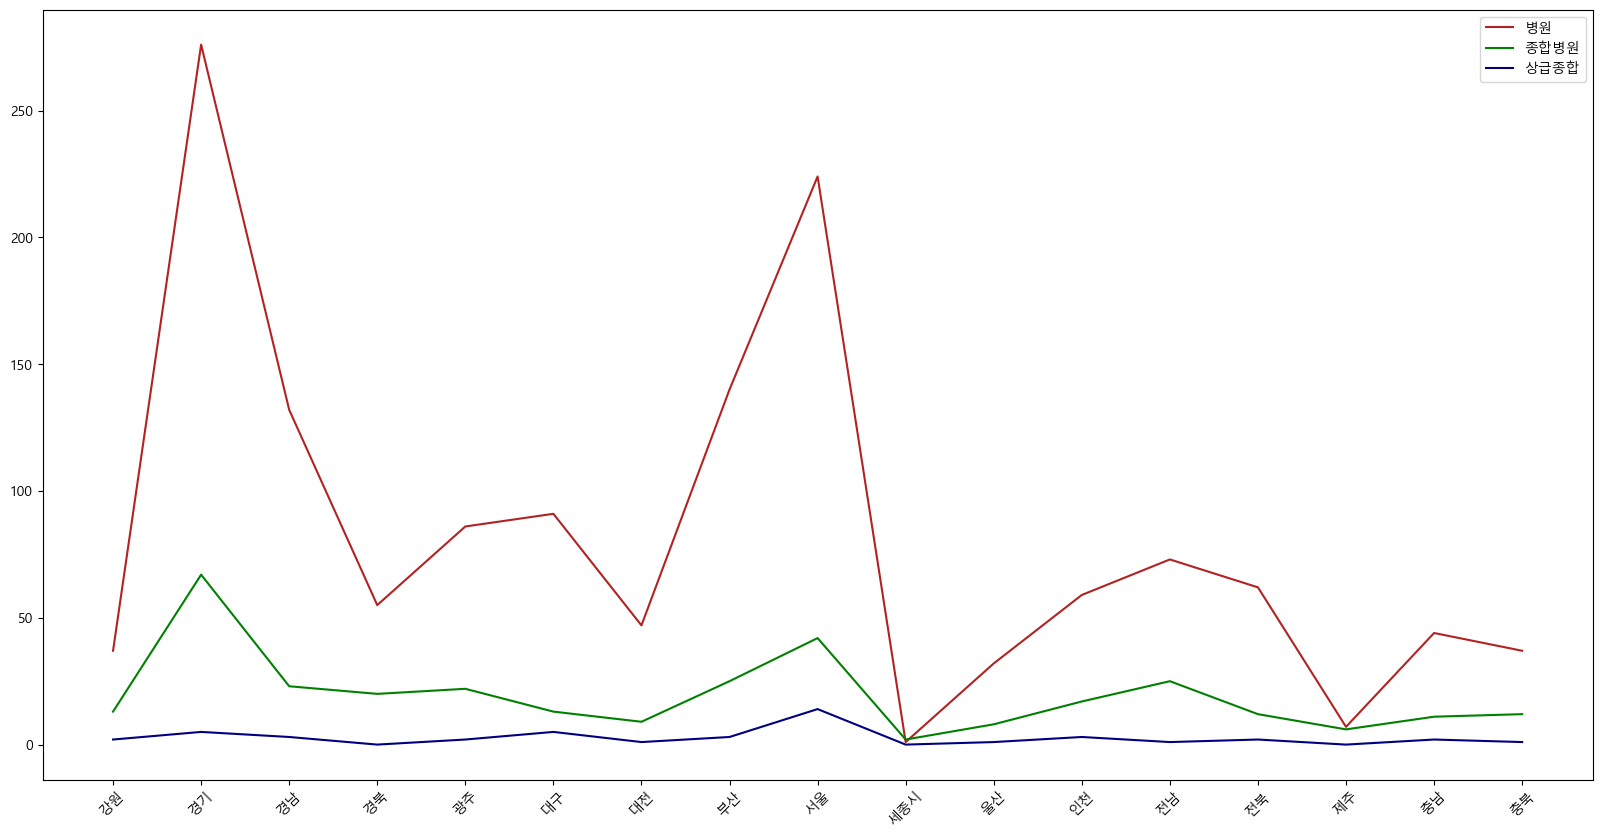

In [235]:
plt.figure(figsize=(20,10))
plt.rcParams['axes.unicode_minus'] = False

plt.plot(x, list(hos_recent_1.values()), color='firebrick')
plt.plot(x, list(hos_recent_2.values()), color='green')
plt.plot(x, list(hos_recent_3.values()), color='navy')
plt.xticks(rotation=45)
plt.legend(['병원', '종합병원', '상급종합'])


plt.show()

<br>
- 병원급 이상 시설 수 그래프를 보았을 때도 다른 지역들 보다 경기, 서울 지역에서 병원 수가 현저히 많은 것을 볼 수 있다.<br>
- 따라서 나머지 (병원급이 아닌) 시설들 또한 경기, 서울 지역에 현저히 수가 많을 것이라고 유추할 수 있다.<br>
- 상급종합의 경우 경북, 세종시, 제주에는 시설이 하나도 없는 것을 알 수 있다.<br>
<br>

# 4. 프로젝트 발전 가능성<br>
- 프로젝트를 바탕으로 하여 정보를 알림으로써 국민들이 지역 의료 불균형에 대해 관심을 가질 수 있고, 이에 대한 개선의 필요성을 느낄 수 있을 것입니다.<br>
<br>
- 도/광역시 뿐만 아니라 시, 읍면동 등 **지역을 좀 더 세분화** 한다면 지역간의 의료 불균형 뿐만 아니라 도시 안에서의 의료 불균형에 대해서도 주목하고 관심을 가질 수 있을 것입니다.<br>
<br>
- 이를 시작으로 하여 의료만이 아닌, 사각지대에 놓여진 다양한 공공서비스들에 대한 불균형들에 대해서도 알린다면 국민의 삶의 질을 높일 수 있을 것입니다.<br>
<br>

# 5. 프로젝트 후기<br>
- 항목들을 좀 더 세분화 하여 데이터 시각화 처리를 하고 싶었고, 데이터 처리를 함에 있어 부족한 부분들이 있는데 이것들을 아직 해결하지 못하여 아쉽다.<br>
<br>
- 그래프를 만들 때 한글이 자꾸 깨지고 x값, y값의 크기가 같지 않아 생기는 value error 등이 있었다. 하지만 인터넷 검색과 스스로 생각하여 여러 시도를 하다보니 이러한 오류들을 해결을 할 수 있었다. 이를 통해 스스로 해결해 나갈 수 있다는 자신감을 얻었다.<br>
<br>
- 부족하지만 한 프로젝트를 혼자 만들어냈다는 것이 자랑스럽고 앞으로 더욱 다양한 데이터를 활용하여 사람들에게 도움이 되는 프로젝트를 만들어보고 싶다.<br>